In [8]:
# importing libraries in order to use its functions like numpy, pandas, matplotlib

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.mlab as mlab
import seaborn as sns
sns.set()


# QUESTION 1
# This function takes the size of the structure plus mean and standard deviation. It then produces a normal distribution based on mean and standard deviation. The number of hits that each block needs requires is determined by that normal distribution. So, it inserts random values from that normal distribution to the array of size(x,y,z) which is passed as an argument in this function.

In [9]:
# Defining a function which takes size of an array i.e (x,y,z) plus mean and standard deviation.
def blockmodel(x,y,z,mu,sigma):
    
    #generating normal distribution from mean and standard deviation.
    #Also, then inserting random numbers from that distribution into array of size (x,y,z)
    a=np.random.normal(mu, sigma, (x,y,z))
    
    #converting the values in the array to int because hits that each block takes can't be floats. 
    #and then returning the array.
    return a.astype(int)

In [10]:
sample=blockmodel(2,3,4,5,0.5)
print(sample)
print(sample.shape)

[[[5 4 5 4]
  [4 5 5 4]
  [4 5 4 5]]

 [[5 3 5 4]
  [4 4 4 4]
  [5 5 5 5]]]
(2, 3, 4)



# QUESTION 2 Part(A)
# Plotting a graph for the number of hurricanes that came each year. In 2010, there were highest number of hurricanes and lowerst number of hurricanes were reocorded in 1908. The transitions between number of transitions each year are huge.

In [11]:
# Importing data using pandas dataframe.
hurricanes_data = pd.read_csv("hurricanes.txt",delim_whitespace=True)

In [12]:
# extracting years column from the dataframe.
years = hurricanes_data["Year"]

# extracting hurricanes column from the dataframe.
hurricanes = hurricanes_data["Hurricanes"]

# extracting named storms column from the dataframe.
Named_Storms=hurricanes_data["NamedStorms"]

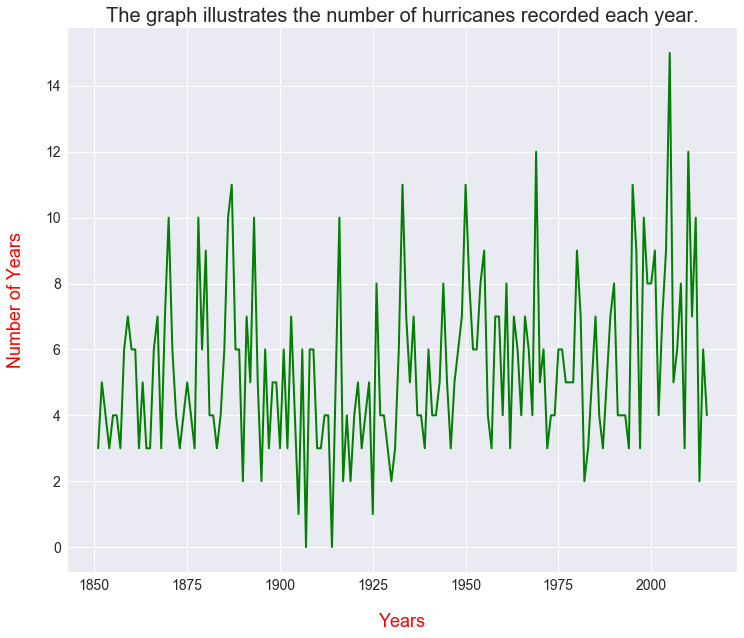

In [13]:
# resizing the plot
plt.figure(figsize=(12, 10))
       
# remove plot frame lines and enabling ticks on bottom and left of the plot
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# leave some space between labels and axis tick marks for both x-axis and y-axis.
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20    

# make ticks bigger for x-axis and y-axis
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
    
# set labels for x-axis and y-axis
plt.ylabel('Number of Years',fontsize=18,color='red')
plt.xlabel('Years',fontsize=18,color='red')

# Plotting title above the plot.
plt.title("The graph illustrates the number of hurricanes recorded each year.",fontsize=20)

# plotting years on x-axis and number of hurricanes at y-axis.
plt.plot(hurricanes_data["Year"].values,hurricanes_data["Hurricanes"].values, color="green", lw=2)
plt.show()

# Question 2 Part(B)
# In Last part, there were huge transitions of hurricanes for each year. So, these are reduced by taking average of number of hurricanes in a year with the hurricanes in neighbouring years. The number of neighbours with which average is done is varied to analyze it better.

In [14]:
# Defining a function which takes hurricanes array as an argument and an integer specified as length.
# it returns the list by doing average of its neighbours at each element.
def running_mean(data,length):
    
    # cumsum method performs commulative sum of the array. 
    cumsum = np.cumsum(np.insert(data,0,0))
    
    # slice the array at the front and at the end by the lenth and computes the average by dividing it by the length argument.
    return (cumsum[length:] - cumsum[:-length]) / length

# https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
       

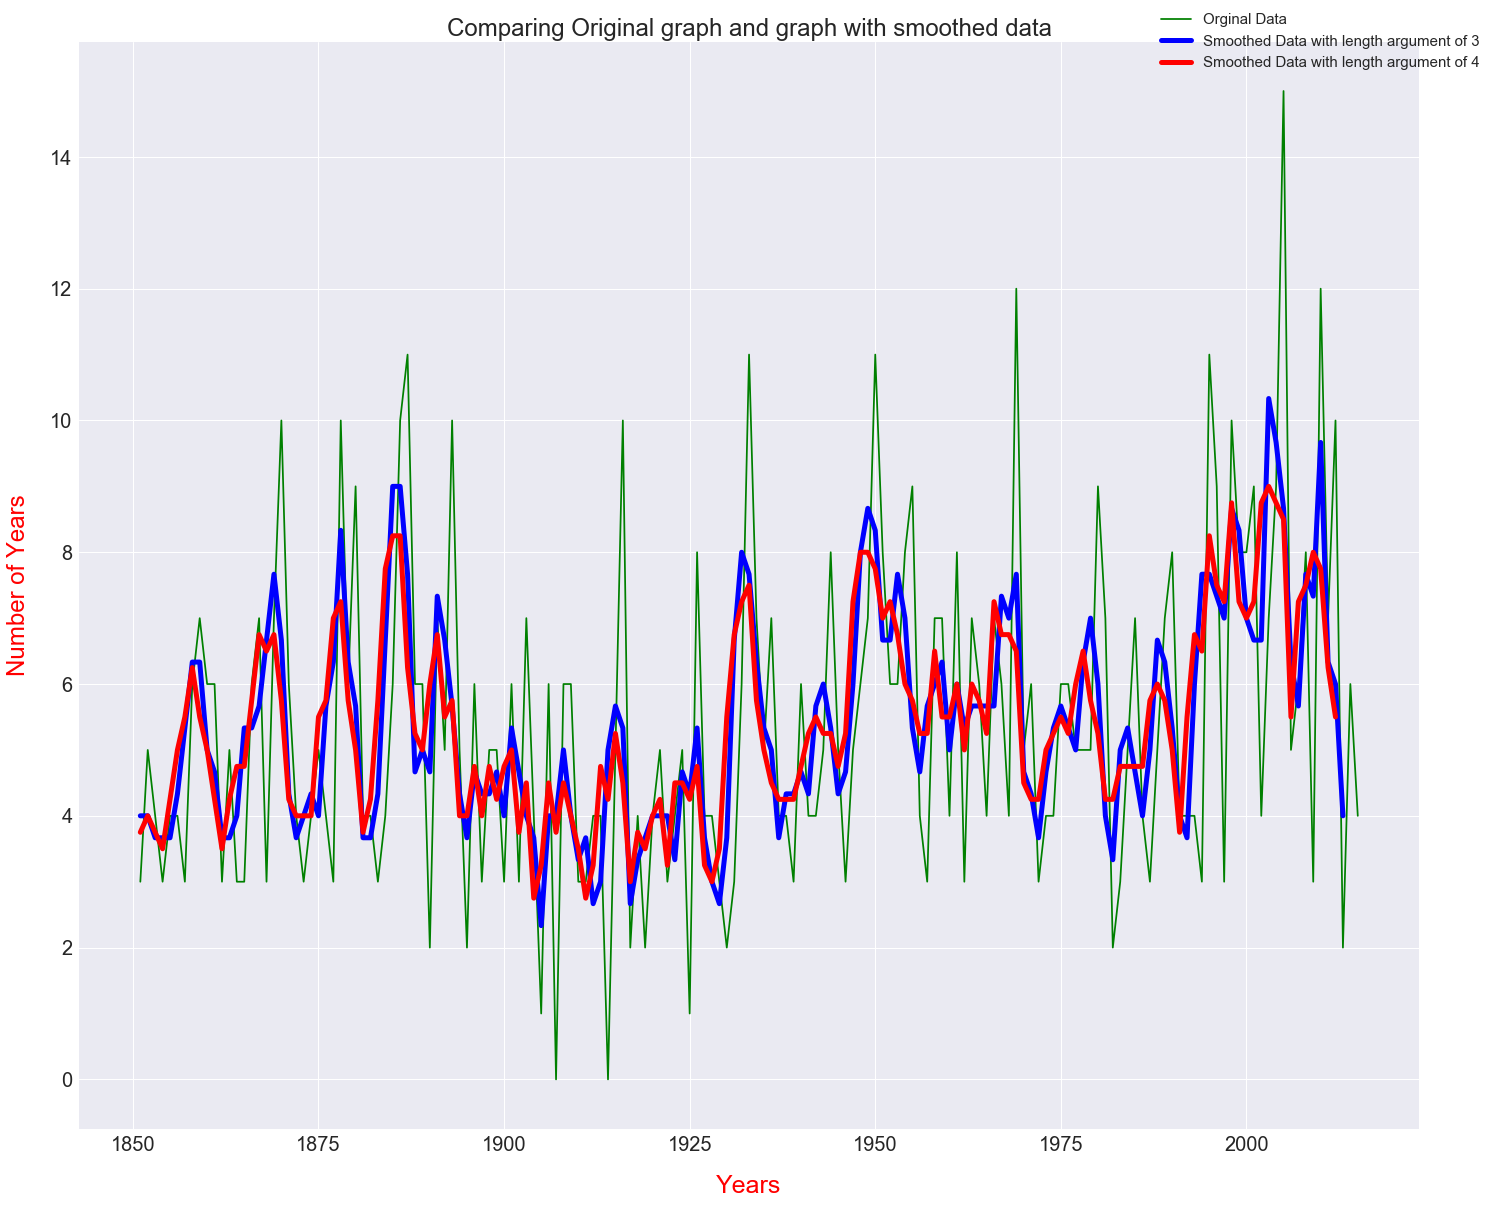

In [15]:
# smothing the hurricane array by passing length argument=3 in the 'running_mean" function.
smoothed_data1=running_mean(hurricanes_data["Hurricanes"].values,3)

# smothing the hurricane array by passing length argument=4 in the 'running_mean" function.
smoothed_data2=running_mean(hurricanes_data["Hurricanes"].values,4)

# resizing the plot
plt.figure(figsize=(24, 20))

# remove plot frame lines and enabling ticks on bottom and left of the plot
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# leave some space between labels and axis tick marks for both x-axis and y-axis
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20    

# make ticks bigger for x-axis and y-axis
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# set labels for x-axis and y-axis
plt.ylabel('Number of Years',fontsize=24,color='red')
plt.xlabel('Years',fontsize=25,color='red')

# plotting the original hurricane data with array for comparing it with smoothed data.
plt.plot(hurricanes_data["Year"].values,hurricanes_data["Hurricanes"].values, color="green",label='Orginal Data')

# plotting the smoothing hurricane data by neighbours it is averaged=3,4 versus year.
plt.plot(hurricanes_data["Year"].values[:-2],smoothed_data1,'blue',lw=5,label='Smoothed Data with length argument of 3')
plt.plot(hurricanes_data["Year"].values[:-3],smoothed_data2,'red',lw=5,label='Smoothed Data with length argument of 4')

# Plotting title
plt.title("Comparing Original graph and graph with smoothed data", fontsize=24)

# position the legends
plt.legend(bbox_to_anchor=(1.05, 1), loc=5, borderaxespad=0.,fontsize='15')
plt.show()


# Question 2 Part (C)
# Histogram is plotted for Tropical Storms. Tropical Stroms are those Named Strorms which aren't Hurricanes. On the top of histogram, gaussian distribution is plotted by computing the mean and Standard Deviation of Tropical Storms data.


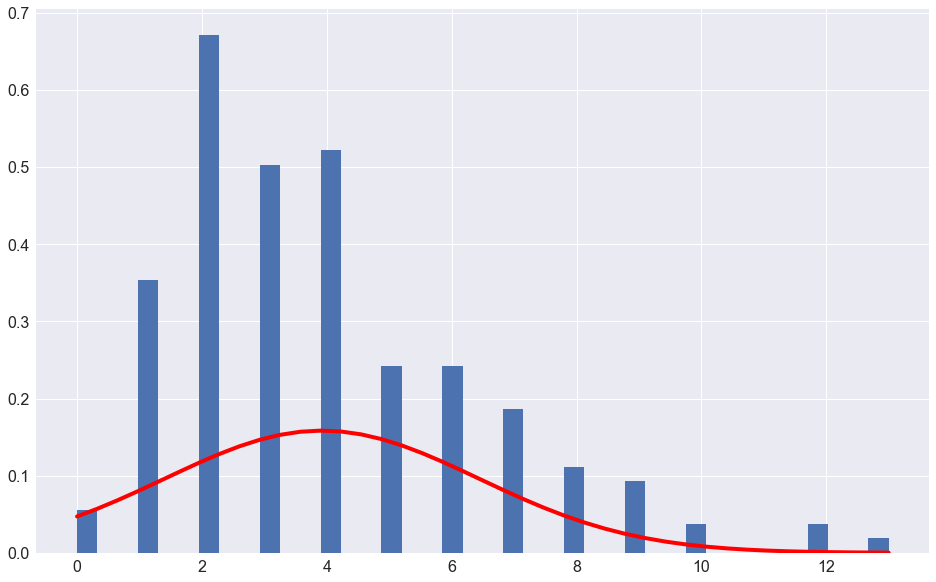

In [16]:
# Tropical Storms that each year are calculated by substracting hurricanes from named storms.
tropical_Storms=Named_Storms-hurricanes

# Calculating mean and standard deviation of the tropical storms data.
mean=np.mean(tropical_Storms.values)
std=np.std(tropical_Storms.values)

# reszing the plot.
plt.figure(figsize=(16, 10))

# remove plot frame lines and enabling ticks on bottom and left of the plot
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
   
# make ticks bigger for x-axis and y-axis
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

# Plotting histogram ann gaussian distribution in one figure.
count, bins, ignored = plt.hist(tropical_Storms.values, 40, normed=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2) ), linewidth=4, color='r')
plt.show()


# Data is not normally distributed. It is also not symmetric at the centre. It is more spread towards lower values of the data. it is right skewed or positively skewed by the fact that the median is lower than mean.

# Question 3 Part (A)

# Demonstrating Conway's game of life using 20 * 20 grid. The steps are as follows:


In [33]:
# This function generates a random boolean matrix of size m * n and return the converted int version of that grid.
def genboard(sizes):
    m,n=sizes
    a=(np.random.choice(a=[False, True], size=sizes))
    b=a.astype(int)
    plt.title("Original Grid",fontsize=16)
    plt.imshow(b,cmap='Greys', interpolation='nearest')
    return b

# This function rotates the grid left,right,top and bootom and then sum it. 
# It actually calculates the number of neighbours for each cell.
def rotate_board_and_sum(board):
    right_roll=np.roll(board, 1, axis=1)
    bottom_roll=np.roll(board, 1, axis=0)
    top_roll=np.roll(board, 2, axis=0)
    left_roll=np.roll(board, 2, axis=1)
    Original_array=right_roll+bottom_roll+top_roll+left_roll
    return Original_array


#This function decides whether the cell is alive or dead based on the **4 rules of life and death** 
def grid(board,x=0):
    rotated_summed_array1=rotate_board_and_sum(board)
    rotated_summed_array=rotate_board_and_sum(board)
    
    if x==0:
        m,n=rotated_summed_array.shape
        for i in range(0,m):
            for j in range(0,n):
                if board[i][j]==1 and rotated_summed_array[i][j]==2:
                    rotated_summed_array[i][j]=1
                elif board[i][j]==1 and rotated_summed_array[i][j]==3:
                    rotated_summed_array[i][j]=1
                elif board[i][j]==1 and rotated_summed_array[i][j]<2:
                    rotated_summed_array[i][j]=0
                elif board[i][j]==1 and rotated_summed_array[i][j]>3:
                    rotated_summed_array[i][j]=0
                elif board[i][j]==0 and rotated_summed_array[i][j]==3:
                    rotated_summed_array[i][j]=1
                elif board[i][j]==0:
                    rotated_summed_array[i][j]=0
        return rotated_summed_array
    
    elif x==1:
        return rotated_summed_array
        
    
# This function generates 20 generations as an image in the same plot.  
def life(size, generations):
    board1=size
    plt.figure(figsize=(15,10))
    
    for i in range(generations):
        board=grid(board1)
        board1=board
        plt.xticks([])
        plt.yticks([])
        plt.subplot(4,5,i+1)
        plt.title("Generation"+str(i+1))
        plt.imshow(board,cmap='Greys', interpolation='nearest')
        

# This function generates the neighbours of each cell.       
def neighbours(size, generations):
    board1=size
    plt.figure(figsize=(15,10))
    
    for i in range(generations):
        board=grid(board1,x=1)
        board1=board
        plt.xticks([])
        plt.yticks([])
        plt.subplot(4,5,i+1)
        plt.title("Neighbours of Gen"+str(i+1))
        plt.imshow(board, cmap='Set3',interpolation='nearest')

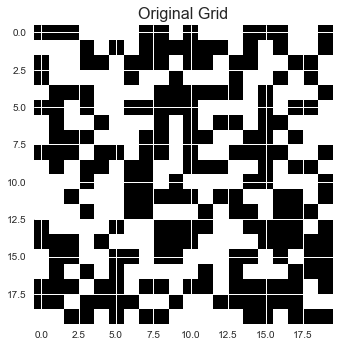

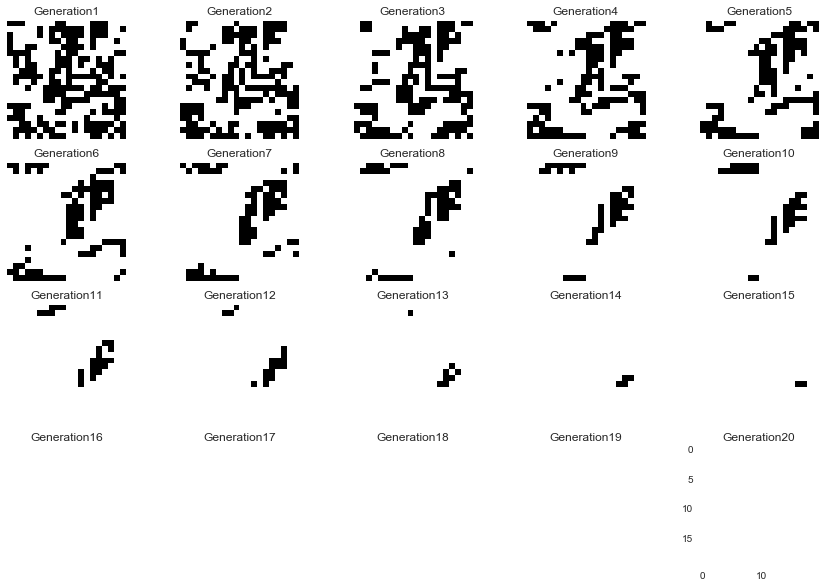

In [34]:
# generating board of size 20 x 20.
board=genboard((20,20))

# printing generations
life(board,20)
plt.show()

# Question 3 Part (B)

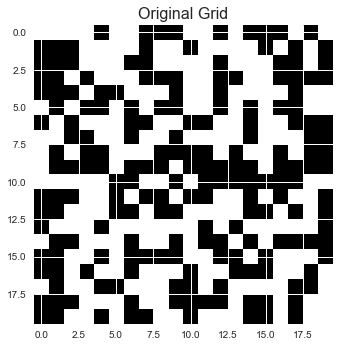

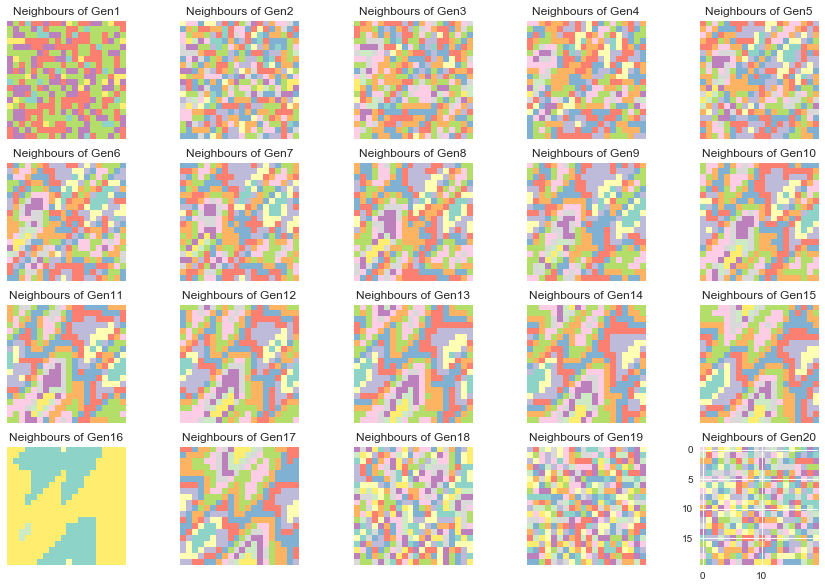

In [35]:
# generating board of size 20 x 20.
board=genboard((20,20))

# printing generations
neighbours(board,20)
plt.show()